In [46]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
from random import shuffle
# Audio params
SAMPLE_RATE = 22050  # (samples/sec)
DURATION = 5.0  # duration in second (sec)
AUDIO_LEN = int(SAMPLE_RATE * DURATION)  # total number of samples in DURATION

def plot_bandwidth(filepath):
    # get all audio files in the folder
    audio_files = [f for f in os.listdir(filepath) if f.endswith(('.wav', '.mp3', '.flac'))]
    shuffle(audio_files)    # 洗牌
    
    audio = audio_files[0]; print("audio_filename:", audio)
    audio_path = os.path.join(filepath, audio)
    y, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
    # pad the audio with the original audio or cut the audio
    if len(y) < AUDIO_LEN:
        length_audio = len(y)
        repeat_count = (AUDIO_LEN + length_audio - 1) // length_audio  # Calculate the `ceiling` of AUDIO_LEN / length_audio
        y = np.tile(y, repeat_count)[:AUDIO_LEN]  # Repeat and cut to the required length
    else:
        y = y[:AUDIO_LEN]

    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    # make spectrogram input into magnitude and phase components
    S, phase = librosa.magphase(librosa.stft(y=y))

    fig, ax = plt.subplots(nrows=2, sharex=True)
    # Return an array of sample indices to match the time axis from a feature matrix.
    times = librosa.times_like(spec_bw)
    centroid = librosa.feature.spectral_centroid(S=S)   # frequency bandwidth for each frame
    # Make a plot with log scaling on the y-axis.
    ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
    ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
    ax[0].legend()
    ax[0].label_outer() # 用來隱藏坐標軸的內部標籤，只顯示外部標籤。

    # Display a spectrogram
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                            y_axis='log', x_axis='time', ax=ax[1], cmap='viridis')
    ax[1].set(title='log Power spectrogram')
    ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                    np.minimum(centroid[0] + spec_bw[0], sr/2),
                    color='darkgoldenrod', alpha=0.5, label='Centroid +- bandwidth')
    ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
    ax[1].legend(loc='lower right')

In [1]:
true_audio_folder = r'D:\EN_audio\audio\sample\true'
false_audio_folder = r'D:\EN_audio\audio\sample\false'

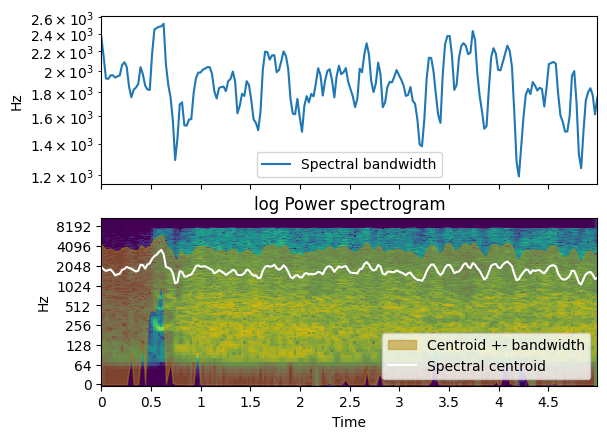

In [40]:
plot_bandwidth(true_audio_folder)

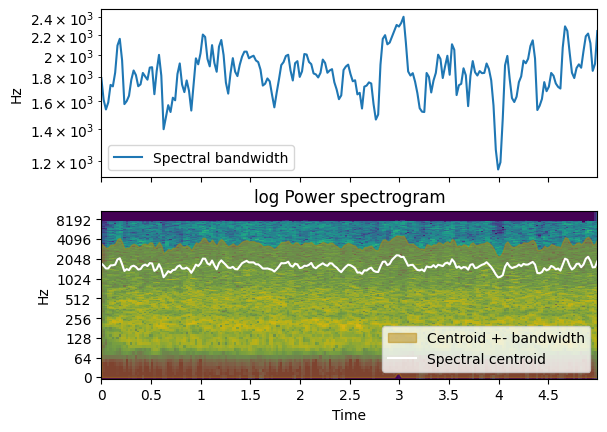

In [41]:
plot_bandwidth(false_audio_folder)

我覺得取平均 效果不好

audio_filename: bonafide_LA_T_3565683.flac


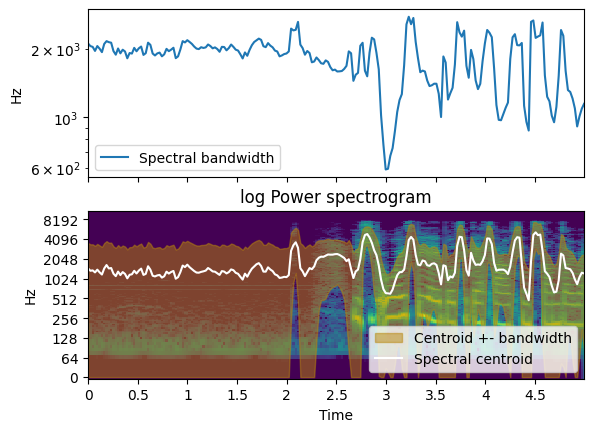

In [75]:
plot_bandwidth(true_audio_folder)

audio_filename: spoof_LA_E_5947364.flac


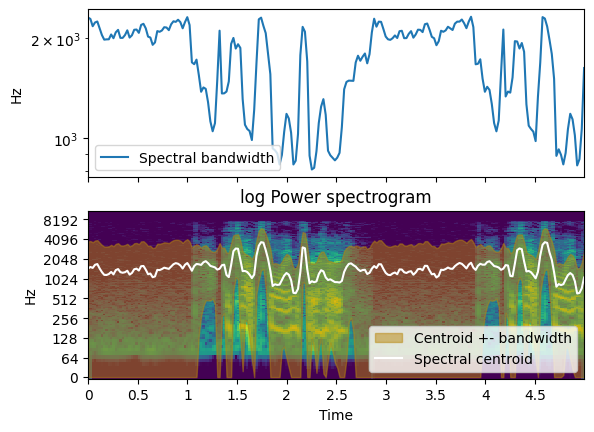

In [67]:
plot_bandwidth(false_audio_folder)